## Differentiation

### Ordinary Differential Equations [Source](https://docs.scipy.org/doc/scipy/reference/tutorial/integrate.html)

![img](img/diff.png)

Odent [Source](https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.odeint.html#scipy.integrate.odeint)

In [56]:
from scipy.integrate import odeint, ode

In [57]:
def dy(y, t, zeta, w0):

    """
    The right-hand side of the damped oscillator ODE
    """
    x, p = y[0], y[1]
    dx = p
    dp = -2 * zeta * w0 * p - w0**2 * x
    return [dx, dp]

In [58]:
# initial state:
y0 = [1.0, 0.0]

In [59]:
# time coodinate to solve the ODE for
t = np.linspace(0, 10, 1000)
w0 = 2*np.pi*1.0

In [60]:
# solve the ODE problem for three different values of the damping ratio
y1 = odeint(dy, y0, t, args=(0.0, w0)) # undamped
y2 = odeint(dy, y0, t, args=(0.2, w0)) # under damped
y3 = odeint(dy, y0, t, args=(1.0, w0)) # critial damping
y4 = odeint(dy, y0, t, args=(5.0, w0)) # over damped

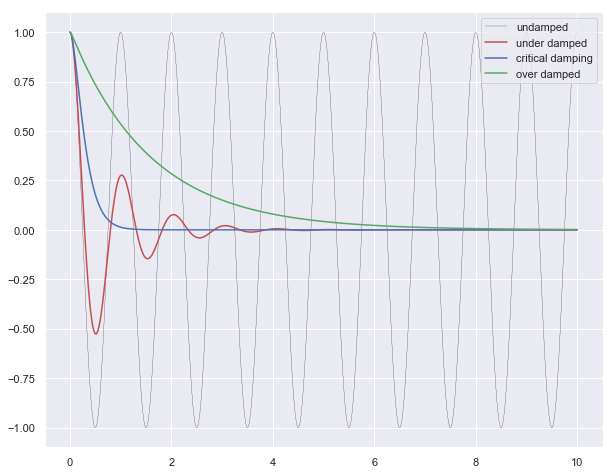

In [64]:
plt.figure(figsize = [10,8])
plt.plot(t, y1[:,0], 'k', label="undamped", linewidth=0.25)
plt.plot(t, y2[:,0], 'r', label="under damped")
plt.plot(t, y3[:,0], 'b', label=r"critical damping")
plt.plot(t, y4[:,0], 'g', label="over damped")
plt.legend();

### Partial Differential Equations

#### PDE : Eliptic Equation (Laplace Euation)

$ \nabla^{2} u  + c f(u) = 0 $

$\frac{\partial^{2}u}{\partial^{2}x} + \frac{\partial^{2}u}{\partial^{2}x} + cf(u) = 0$

for $c=1, f(u)=0$ it becomes Laplace Equation

![img](img/lattice.png)

Using Above lattice of finite difference:

![img](img/eq.png)

$\large{u_{i−1,j}+u_{i+1,j} + u_{i,j−1} + u{i,j+1} − 4u_{i,j}+cf(u_{i,j})=0}$

$u_{i,j}=0;  \forall u \in ∂Ω$


for 4 by 4 lattice : [source](http://folk.ntnu.no/leifh/teaching/tkt4140/._main055.html)

$\begin{equation}
    \left(\begin{array}{ccccccccccccccc}
      -4& 1 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 &0 &0 \\ 
      1& -4 & 1 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 &0 &0\\ 
      0& 1 & -4 & 1 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 & 0 &0 &0\\ 
      0& 0 & 1 & -4 & 1 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & 0 &0 &0\\ 
      0& 0 & 0 & 1 & -4 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 &0 &0\\ 
      1& 0 & 0 & 0 & 0 & -4 & 1 & 0 & 0 & 0 & 1 & 0 & 0 & 0 &0 &0\\ 
      0& 1 & 0 & 0 & 0 & 1 & -4 & 1 & 0 & 0 & 0 & 1 & 0 & 0 &0 &0\\ 
      0& 0 & 1 & 0 & 0 & 0 & 1 & -4 & 1 & 0 & 0 & 0 & 1 & 0 &0 &0\\ 
      0& 0 & 0 & 1 & 0 & 0 & 0 & 1 & -4 & 1 & 0 & 0 & 0 & 1 &0 &0\\ 
      0& 0 & 0 & 0 & 1 & 0 & 0 & 0 & 1 & -4 & 0 & 0 & 0 & 0 &1 &0\\ 
      0& 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 & -4 & 1 & 0 & 0 &0 &0\\ 
      0& 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 1 & -4 & 1 & 0 &0 &0\\ 
      0& 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 1 & -4 & 1 &0 &0\\ 
      0& 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 1 & -4 &1 &0\\ 
      0& 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 1 &-4 &1\\
       0& 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 1 & 0 & 0 & 0 & 0 &1 &-4\\
    \end{array}\right)
    \cdot
    \left(\begin{array}{c}
      u_{11}\\ 
      u_{12}\\ 
      u_{13}\\ 
      u_{14}\\ 
      u_{21}\\ 
      u_{22}\\ 
      u_{23}\\ 
      u_{24}\\ 
      u_{31}\\ 
      u_{32}\\ 
      u_{33}\\ 
      u_{34}\\ 
      u_{41}\\ 
      u_{42}\\ 
      u_{43}\\
      u_{44}
    \end{array}\right)
    =
    \left(\begin{array}{c}
      0\\ 
      0\\ 
      0\\ 
      0\\ 
      a\\ 
      0\\ 
      0\\ 
      0\\ 
      0\\ 
      b\\ 
      0\\ 
      0\\ 
      0\\ 
      0\\ 
      c\\
      0
    \end{array}\right)\end{equation}$

-----

Problem Type : Solve

$\large{Ax = b}$

#### Implementation of [Least square methods](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html#scipy.optimize.least_squares) to solve a $Ax = b$ problem as a optimization problem

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import least_squares
from scipy.sparse import coo_matrix
import seaborn as sns
sns.set()

In [20]:
n = 100
c = 1

In [21]:
def f(u):
    return u**3

def f_prime(u):
    return 3 * u**2

#### Prepare the lattice

In [22]:
def fun(u, n,f, f_prime,c, **kwargs):
    v = np.zeros((n + 2, n + 2))
    
    #buttom value = 1
    v[n+1,:] = 1
    # top value = 1
    #v[0,:] = 1
    # center value = 1
    #v[int(n/2),int(n/2)] = 1
    
    
    u = u.reshape((n, n))
    v[1:-1, 1:-1] = u
    y = v[:-2, 1:-1] + v[2:, 1:-1] + v[1:-1, :-2] + v[1:-1, 2:] - 4 * u + c * f(u)
    return y.ravel()

#### Prepare Jacobians

In [23]:
def compute_jac_indices(n):
    i = np.arange(n)
    jj, ii = np.meshgrid(i, i)

    ii = ii.ravel()
    jj = jj.ravel()

    ij = np.arange(n**2)

    jac_rows = [ij]
    jac_cols = [ij]

    mask = ii > 0
    ij_mask = ij[mask]
    jac_rows.append(ij_mask)
    jac_cols.append(ij_mask - n)

    mask = ii < n - 1
    ij_mask = ij[mask]
    jac_rows.append(ij_mask)
    jac_cols.append(ij_mask + n)

    mask = jj > 0
    ij_mask = ij[mask]
    jac_rows.append(ij_mask)
    jac_cols.append(ij_mask - 1)

    mask = jj < n - 1
    ij_mask = ij[mask]
    jac_rows.append(ij_mask)
    jac_cols.append(ij_mask + 1)

    return np.hstack(jac_rows), np.hstack(jac_cols)


In [24]:
jac_rows, jac_cols = compute_jac_indices(n)

In [25]:
jac_rows, jac_cols

(array([   0,    1,    2, ..., 9996, 9997, 9998]),
 array([   0,    1,    2, ..., 9997, 9998, 9999]))

In [26]:
def jac(u, n,f, f_prime,c, jac_rows=None, jac_cols=None):
    jac_values = np.ones_like(jac_cols, dtype=float)
    jac_values[:n**2] = -4 +  c * f_prime(u)
    return coo_matrix((jac_values, (jac_rows, jac_cols)), shape=(n**2, n**2))


In [27]:
u0 = np.ones(n**2) * 0.5

#### [Optimization: Least Square](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html#scipy.optimize.least_squares)

In [28]:
res_1 = least_squares(fun, u0, jac=jac, gtol=1e-3, args=(n,f, f_prime,c),\
                      kwargs={'jac_rows': jac_rows, 'jac_cols': jac_cols}, verbose=1)

`gtol` termination condition is satisfied.
Function evaluations 738, initial cost 1.1562e+02, final cost 6.4462e-01, first-order optimality 9.38e-04.


#### Returned quantities after solution

In [21]:
res_1.x.shape

(10000,)

In [17]:
res_1.x

array([0.00622038, 0.01236634, 0.01833963, ..., 0.01834064, 0.01236645,
       0.00622026])

In [19]:
res_1.fun

array([-0.00014825, -0.00029118, -0.00041394, ..., -0.000414  ,
       -0.00029121, -0.00014826])

In [22]:
res_1.fun.shape

(10000,)

In [23]:
res_1.jac

<10000x10000 sparse matrix of type '<class 'numpy.float64'>'
	with 49600 stored elements in Compressed Sparse Row format>

#### Plot the solutions

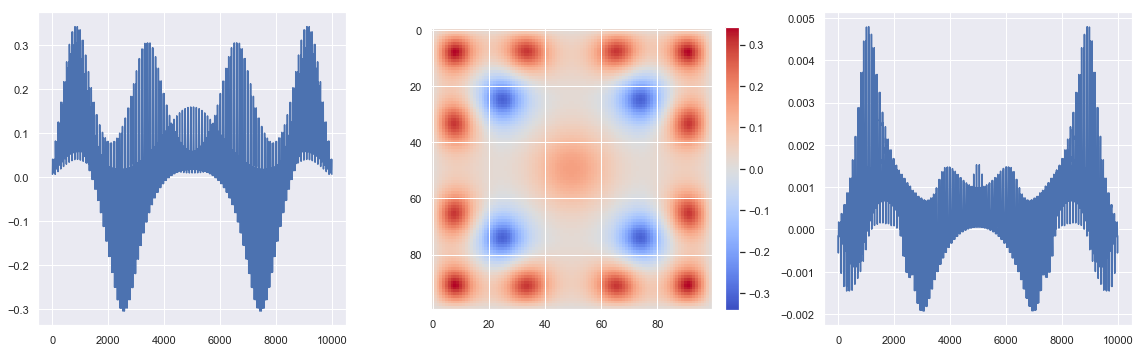

In [20]:
plt.figure(figsize=(16, 5))

plt.subplot(131)
plt.plot(res_1.x)


plt.subplot(132)
plt.imshow(res_1.x.reshape((n, n)),\
           cmap='coolwarm',\
           vmin=-max(abs(res_1.x)),\
           vmax=max(abs(res_1.x)))

plt.colorbar(use_gridspec=True,\
             fraction=0.046,\
             pad=0.04)



plt.subplot(133)
plt.plot(res_1.fun)


plt.tight_layout()

### References:
1. http://folk.ntnu.no/leifh/teaching/tkt4140/._main000.html
2. http://folk.ntnu.no/leifh/teaching/tkt4140/._main055.html
3. https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.least_squares.html#scipy.optimize.least_squares